<a href="https://colab.research.google.com/github/celefigs/collaborative_project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from PIL import Image 
from IPython.display import display  

# Data Science Project

## Table of Contents
- [Context Introduction](#context-introduction)
- [Importing Libraries and Reading the Data](#importing-libraries-and-reading-the-data)
- [Initial DataFrame Exploration](#initial-dataframe-exploration)
- [Data Cleaning](#data-cleaning)
  - Filtering Relevant Conditions
- [Summary Statistics: Numeric and Categorical](#summary-statistics-numeric-and-categorical)
- [Visualization](#visualization)
- [Top 5 Most Used Drugs](#top-5-most-used-drugs)
- [Text Processing](#text-processing)


In [3]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# img = mpimg.imread(r'../images/Sentiment-analysis-HUB-Final')
# plt.figure(figsize=(10, 5))  
# plt.imshow(img)
# plt.axis('off')  # Opcional: oculta los ejes
# plt.show()


## Context Introduction

recoleccion de datos, etc

## Importing Libraries and Reading the Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

import nltk
import re

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

from wordcloud import WordCloud

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('punkt_tab')
# nltk.download('stopwords')

In [5]:
file_path = '../data/drugsComTrain.csv' 

drug_data_df=pd.read_csv(file_path)

drug_data_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


## Initial DataFrame Exploration

In [6]:
drug_data_df.shape 

(161297, 7)

In [7]:
drug_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [8]:
#remove column "UniqueID"

drug_data_df=drug_data_df.drop(columns=['uniqueID'])

drug_data_df.head(2)

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192


## Data Cleaning

In [9]:
#lower for clarification

drug_data_df.columns = drug_data_df.columns.str.lower()

**Filtering Relevant Conditions**

In [10]:
#search related words in a "condition" column and create a new DataFrame with only the relevant conditions

pattern = r'birth|birth control|contraception|contraceptive methods|birth control pills|birth control devices|family planning'

filtered_df = drug_data_df[drug_data_df['condition'].str.contains(pattern, case=False, na=False)]

filtered_df.head()

,drugname,condition,review,rating,date,usefulcount
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10


In [11]:
#cuantas condiciones tenemos? also, in this step reduce the rows in 129846

formatted_conditions = ', '.join(filtered_df['condition'].unique())

print(f"The related conditions are: {formatted_conditions}")

The related conditions are: Birth Control, Emergency Contraception


In [12]:
filtered_df.duplicated().sum() #if had---> drop dupl

0

In [13]:
#buscar nan values

nan_values = filtered_df.isna().sum()

print(nan_values)

drugname       0
condition      0
review         0
rating         0
date           0
usefulcount    0
dtype: int64


## Summary Statistics: Numeric and Categorical

**Summary statistics for numerical columns**

In [14]:
filtered_df.describe().T

# rating: 6,27 media;
# std	3.33-> means diversity;
# rating goes from 1 to 10; 

,count,mean,std,min,25%,50%,75%,max
rating,31251.0,6.274551,3.331740,1.0,3.0,7.0,9.0,10.0
usefulcount,31251.0,8.248824,17.665796,0.0,2.0,5.0,9.0,1247.0


Rating

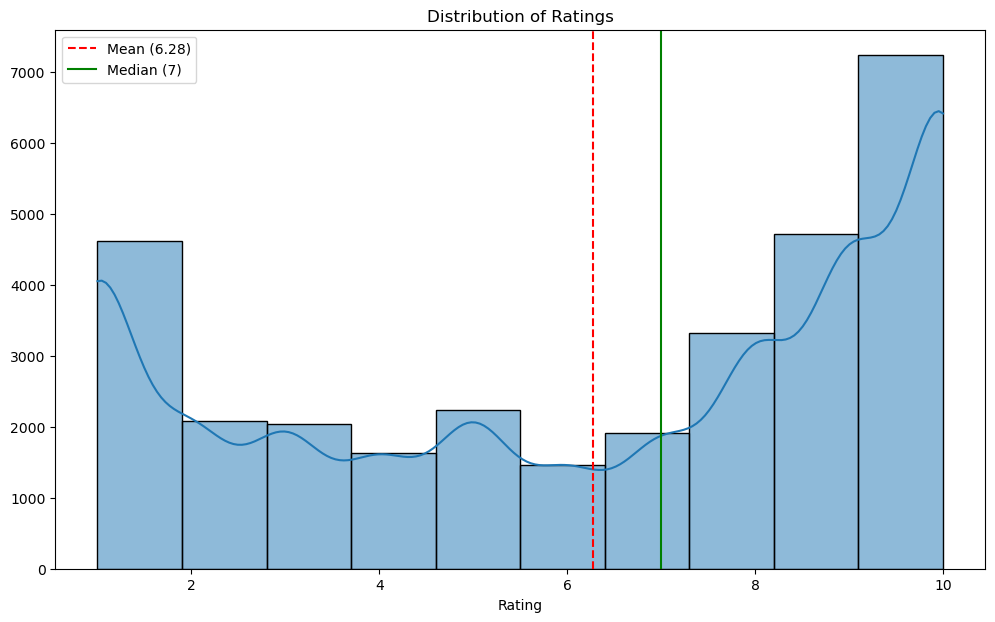

In [15]:
# Rating:  this graphic help us to explain  the 2nd and 3rd cuartiles 

plt.figure(figsize=(12, 7))

sns.histplot(filtered_df['rating'], bins=10, kde=True)

plt.axvline(x=filtered_df['rating'].mean(), color='red', linestyle='--', label='Mean (6.28)')
plt.axvline(x=filtered_df['rating'].median(), color='green', linestyle='-', label='Median (7)')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('')
plt.legend()
#plt.grid()



find out about over rating, rating vs bad reviews

Useful Count

- Range goes from 0 to 1247, indicating that some reviews received a high number of useful votes while others were not considered useful at all.
- Approximately 3.96% of reviews are deemed useful
- 75% of reviews received 9 or fewer useful votes, indicating that many reviews fall within a lower utility range
- High variability in useful votes suggests that reviews are perceived quite differently; some receive numerous useful votes while others do not, reflecting differences in quality, relevance, or style.

#I didn't create a graph because it's hard for me to explain it

**Summary statistics for categorical columns**

In [16]:
filtered_df.describe(exclude='number').T

,count,unique,top,freq
drugname,31251,182,Levonorgestrel,3350
condition,31251,2,Birth Control,28788
review,31251,19715,"""I began taking Mononesse April 28th 2015. I w...",4
date,31251,3085,22-Sep-15,48


## Visualization

**Top 5 Most Used Drugs**

In [17]:
#top 5 drugName 
#top_5_used_drugs = filtered_df['drugname'].value_counts().sort_values(ascending=False).head(5)

top_5_used_drugs = filtered_df['drugname'].value_counts().nlargest(5)

top_5_used_drugs

drugname
Levonorgestrel                        3350
Etonogestrel                          3314
Ethinyl estradiol / norethindrone     2337
Nexplanon                             2149
Ethinyl estradiol / levonorgestrel    1600
Name: count, dtype: int64

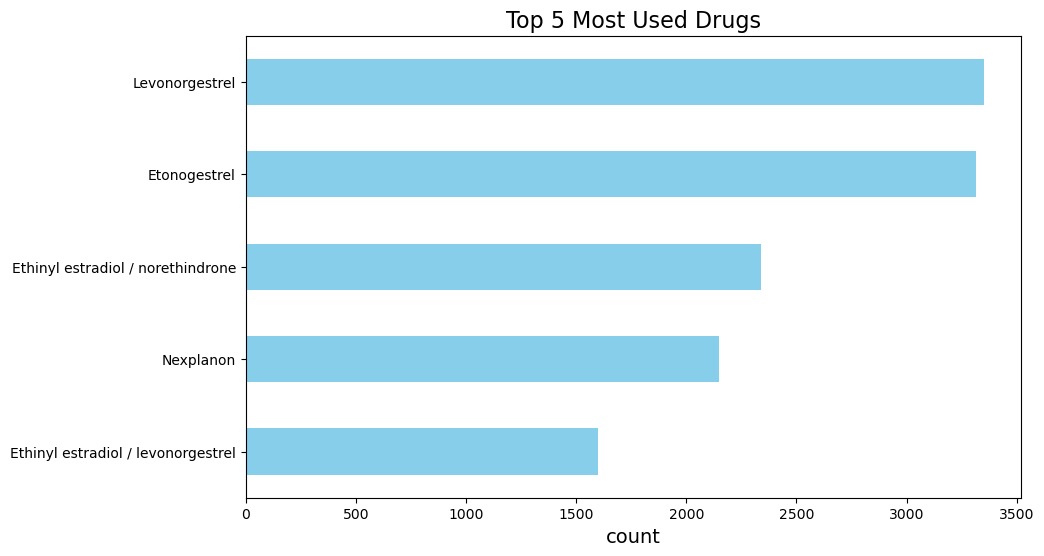

In [18]:
import matplotlib.pyplot as plt


top_5_used_drugs = filtered_df['drugname'].value_counts().nlargest(5).sort_values(ascending= True)

plt.figure(figsize=(10, 6))
top_5_used_drugs.plot(kind='barh', color='skyblue')
plt.title('Top 5 Most Used Drugs', fontsize=16)
plt.xlabel('count', fontsize=14)
plt.ylabel('')

#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [19]:
#I would like to create a visualization of the top 5 drugs vs average ratings of each,
# #I've tried using groupby and haven't been able to d oit

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Celeste\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# segregation for analysis Top 5 
# Levonorgestrel                       
# Etonogestrel                         
# Ethinyl estradiol / norethindrone  
# Nexplanon                             
# Ethinyl estradiol / levonorgestrel


levonorgestrel_reviews = filtered_df[filtered_df['drugname'] == 'Levonorgestrel']['review'].tolist()
etonogestrel_reviews = filtered_df[filtered_df['drugname'] == 'Etonogestrel']['review'].tolist()
ethinyl_estradiol_nore_reviews = filtered_df[filtered_df['drugname'] == 'Ethinyl estradiol / norethindrone']['review'].tolist()
nexplanon_reviews = filtered_df[filtered_df['drugname'] == 'Nexplanon']['review'].tolist()
ethinyl_estradiol_levo_reviews = filtered_df[filtered_df['drugname'] == ' Ethinyl estradiol / levonorgestrel']['review'].tolist()



(-0.5, 799.5, 399.5, -0.5)

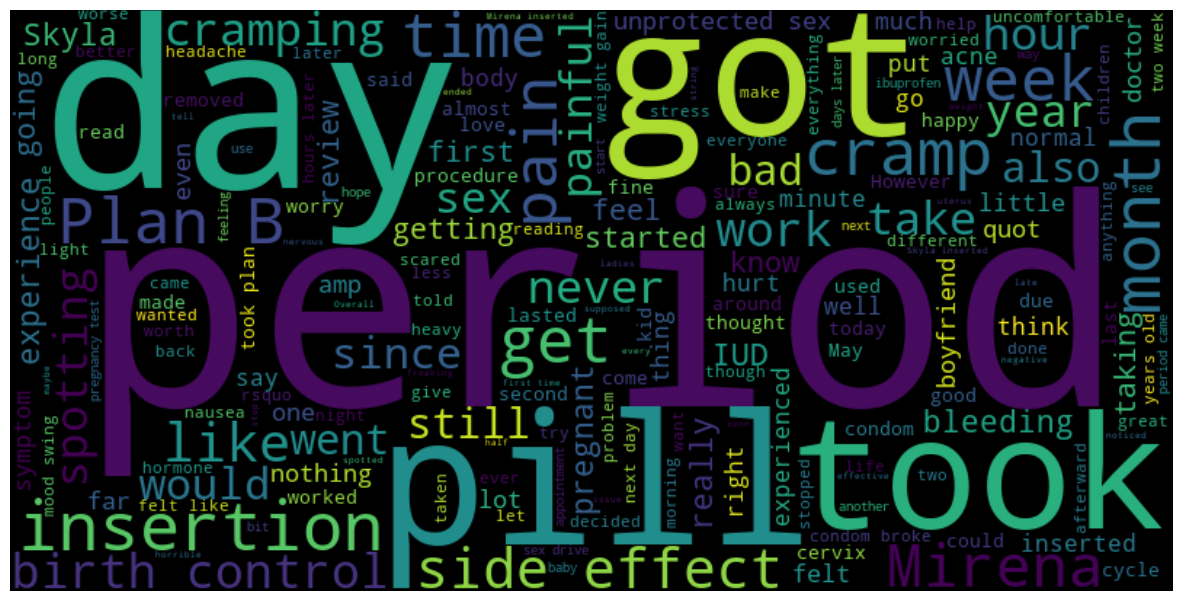

In [41]:

stops = set(stopwords.words('english'))

#wordcloud_levonogestrel = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords).generate(levonorgestrel_reviews)
wordcloud_levonorgestrel = WordCloud(background_color="black", width=800, height=400, stopwords=stops).generate(" ".join(levonorgestrel_reviews))

# Plott the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_levonorgestrel, interpolation='bilinear')
plt.axis("off")


(-0.5, 799.5, 399.5, -0.5)

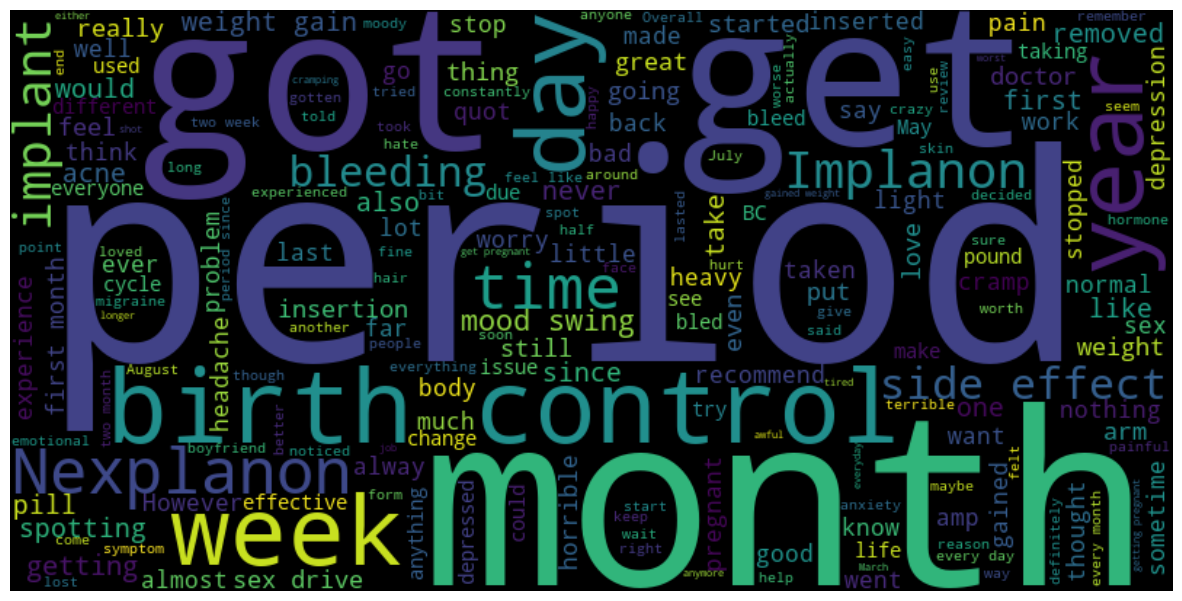

In [42]:
wordcloud_etenogestrel = WordCloud(background_color="black", width=800, height=400, stopwords=stops).generate(" ".join(etonogestrel_reviews))

# Plott the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_etenogestrel, interpolation='bilinear')
plt.axis("off")

In [44]:
filtered_df['review']

2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
6         "He pulled out, but he cummed a bit in me. I t...
9         "I had been on the pill for many years. When m...
14        "Started Nexplanon 2 months ago because I have...
                                ...                        
161268    "I switched to Portia 12 days ago when I start...
161269    "When I first starting taking Lo Loestrin Fe, ...
161271    "My experience: Painful insertion but I expect...
161273    "I have had the Nexplanon since Dec. 27, 2016 ...
161291    "This would be my second month on Junel. I&#03...
Name: review, Length: 31251, dtype: object

(-0.5, 799.5, 399.5, -0.5)

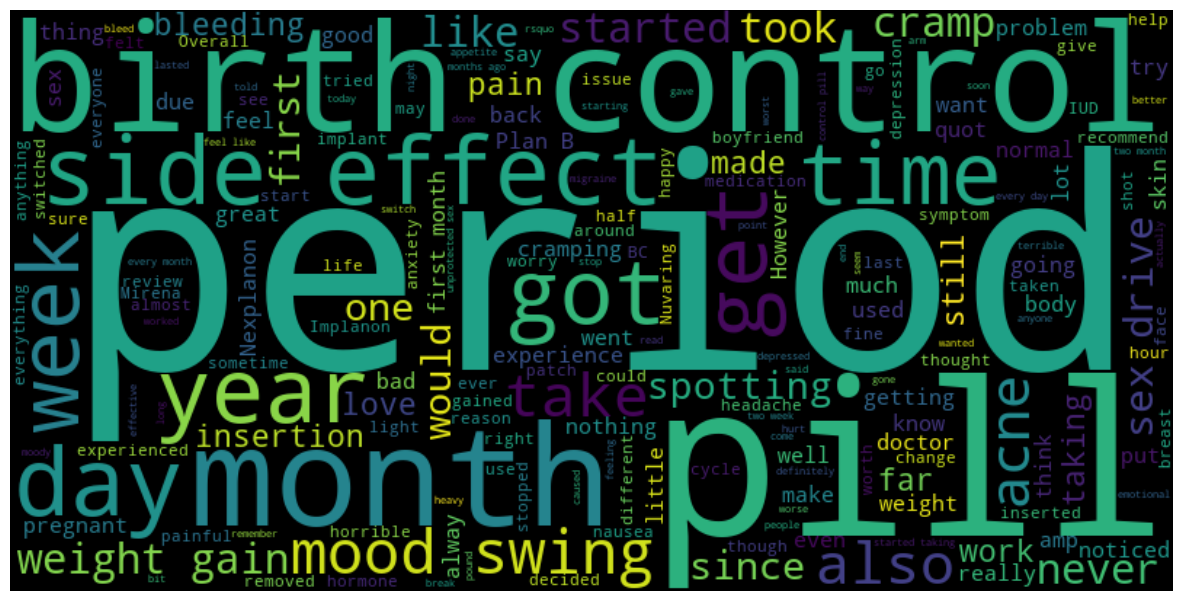

In [45]:
#mejorar stopwords

wordcloud_review = WordCloud(background_color="black", width=800, height=400, stopwords=stops).generate(" ".join(filtered_df['review']))

# Plott the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.axis("off")

In [43]:
filtered_df

,drugname,condition,review,rating,date,usefulcount
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
9,Ethinyl estradiol levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10
...,...,...,...,...,...,...
161268,Portia,Birth Control,"""I switched to Portia 12 days ago when I start...",1,28-Jan-14,9
161269,Ethinyl estradiol norethindrone,Birth Control,"""When I first starting taking Lo Loestrin Fe, ...",10,20-Apr-15,13
161271,Mirena,Birth Control,"""My experience: Painful insertion but I expect...",10,26-Jan-16,4
161273,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0


## Text Processing

In [23]:
#Tokenization

# Def regex
REPLACE_NO_SPACE = re.compile(r"[.;:!#\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)")

In [24]:
filtered_df['drugname'][9]

'Ethinyl estradiol / levonorgestrel'

In [25]:
#Preprocess function for 'drugname' column

def preprocess_drugname(drugname):

    #remove special characters
    drugname = re.sub(REPLACE_NO_SPACE, "", drugname)
    drugname= re.sub(REPLACE_WITH_SPACE, " ", drugname)
     
    # Remove leading/trailing whitespace
    drugname = drugname.strip()
    
    # Remove double spaces
    drugname = re.sub(r'\s+', ' ', drugname)

    return drugname

In [26]:
#filtered_df['drugname'] = filtered_df['drugname'].apply(preprocess_drugname)

filtered_df.loc[:,'drugname'] = filtered_df['drugname'].apply(preprocess_drugname) # ":" todas las filas -> df.loc[fila, columna]

In [27]:
filtered_df['drugname'][9]

'Ethinyl estradiol levonorgestrel'

In [28]:
#Preprocess function for 'review' column

stop_words = set(stopwords.words('english'))

def preprocess_review(reviews):

    #remove special characters
    reviews = re.sub(REPLACE_NO_SPACE, "", reviews)
    reviews = re.sub(REPLACE_WITH_SPACE, " ", reviews)

    tokens = word_tokenize(reviews)

    # lowercase and lemmatize
    lemmatizer = WordNetLemmatizer()

    lemmas = [lemmatizer.lemmatize(token.lower(), pos='v') for token in tokens if token.lower() not in stop_words]
    lemmas = [lemmatizer.lemmatize(token.lower(), pos='n') for token in lemmas if token.lower() not in stop_words]


    return lemmas

In [29]:
# Def regex
REPLACE_NO_SPACE = re.compile(r"[.;:!#\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)")

# re.sub

In [30]:
stop_words = set(stopwords.words('english'))

In [32]:
print(stop_words)

{"isn't", 'against', 'weren', 'yours', 'each', 'we', 'how', 'when', "wouldn't", "didn't", 'this', 'these', "won't", 'but', "you're", 've', 'further', 'too', 'yourselves', 's', 'the', 'into', 'during', 'did', 'below', 'from', 'themselves', 'about', 'isn', 'mightn', "mustn't", "hasn't", 'having', 'itself', 'what', 'here', "needn't", 'that', 'down', "you'll", 'by', 'as', 'on', 'it', 'once', 'its', 'same', 'myself', 'theirs', 'she', "you'd", 'because', 'they', 'ain', 'his', 'he', 'a', 'ma', 'my', 'have', 'herself', 'all', 'at', "should've", 'just', 'through', 'if', "shouldn't", 'few', 'between', 'not', 'haven', 'above', 'any', 'out', 'wouldn', 'will', 'before', 'over', 'in', 'no', 'own', "couldn't", 'so', 'both', 'only', 'hasn', 'your', 'should', "haven't", 'now', 'of', 'why', "don't", "that'll", 'do', 'i', "she's", 'be', 'under', 'll', 'don', 'an', 'more', 'can', "weren't", 'm', 'are', 'ourselves', 'her', 'them', 'me', 'am', 'mustn', 'himself', 'were', 'does', 'off', 'shan', 'wasn', "wasn

In [34]:
def cleaning_function(reviews):

    #characters
    reviews = re.sub(REPLACE_NO_SPACE, "", reviews)
    reviews = re.sub(REPLACE_WITH_SPACE, "", reviews)

    #tokenize
    tokens = word_tokenize(reviews) #new job

    #lemmas:  lemma, lower, stopwords
    lemmatizer = WordNetLemmatizer()

    lemmas = [lemmatizer.lemmatize(token.lower(), pos='v') for token in tokens if token.lower() not in stop_words]
    lemmas = [lemmatizer.lemmatize(token.lower(), pos='n') for token in lemmas if token.lower() not in stop_words]

    return lemmas

In [98]:
preprocess_review('sung')

['sing']

In [93]:
filtered_df['review'].iloc[9]

'"I was off birth control for a while considering getting pregnant. I had used other types of birth control before, the pill, the patch, etc. I decided to get back on birth control but didn&#039;t want to worry about taking a daily pill so I requested the Nuvaring. When I started the Nuvaring I felt it inside my body and had a lot of cramps. A few days later I started experiencing more cramps and very strong upper stomach pain. They were so bad I missed work for a week. Finally I ended up going to the ER and they couldn&#039;t figure out what was wrong. I finally asked the doctor and it was the Nuvaring side effects."'

In [94]:
#sanity check
filtered_df['review'].iloc[9]

'"I was off birth control for a while considering getting pregnant. I had used other types of birth control before, the pill, the patch, etc. I decided to get back on birth control but didn&#039;t want to worry about taking a daily pill so I requested the Nuvaring. When I started the Nuvaring I felt it inside my body and had a lot of cramps. A few days later I started experiencing more cramps and very strong upper stomach pain. They were so bad I missed work for a week. Finally I ended up going to the ER and they couldn&#039;t figure out what was wrong. I finally asked the doctor and it was the Nuvaring side effects."'

In [95]:
preprocess_review(filtered_df['review'].iloc[9])

['birth',
 'control',
 'considering',
 'getting',
 'pregnant',
 'used',
 'type',
 'birth',
 'control',
 'pill',
 'patch',
 'etc',
 'decided',
 'get',
 'back',
 'birth',
 'control',
 '&',
 '039t',
 'want',
 'worry',
 'taking',
 'daily',
 'pill',
 'requested',
 'nuvaring',
 'started',
 'nuvaring',
 'felt',
 'inside',
 'body',
 'lot',
 'cramp',
 'day',
 'later',
 'started',
 'experiencing',
 'cramp',
 'strong',
 'upper',
 'stomach',
 'pain',
 'bad',
 'missed',
 'work',
 'week',
 'finally',
 'ended',
 'going',
 'er',
 '&',
 '039t',
 'figure',
 'wrong',
 'finally',
 'asked',
 'doctor',
 'nuvaring',
 'side',
 'effect']

In [88]:
## consultas:
# 1- does preprocess_review working well? I think lemma is not working 



In [89]:
filtered_df.review

2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
6         "He pulled out, but he cummed a bit in me. I t...
9         "I had been on the pill for many years. When m...
14        "Started Nexplanon 2 months ago because I have...
                                ...                        
161268    "I switched to Portia 12 days ago when I start...
161269    "When I first starting taking Lo Loestrin Fe, ...
161271    "My experience: Painful insertion but I expect...
161273    "I have had the Nexplanon since Dec. 27, 2016 ...
161291    "This would be my second month on Junel. I&#03...
Name: review, Length: 31251, dtype: object

In [90]:
# vectoriser = TfidfVectorizer(analyzer=preprocess_review)
# data_tfidf = vectoriser.fit_transform(filtered_df.review)

In [91]:
#wordcloud

In [92]:
df['matched_type'].unique()  #method of administration. It specifies whether the contraceptive is an oral pill, implant, intrauterine device (IUD), emergency contraceptive, or hormonal contraceptive patch.

#matched_type -> how the contraceptive is used or administered? 
# standard means pill?

NameError: name 'df' is not defined